### Airline Passengers Prediction - The Time Series Prediciton with LSTM 

#### LSTM for international airline passengers problem with regression framing

In [1]:
# importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf
tf.config.list_physical_devices('GPU')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# fix random seed for reproducibility
np.random.seed(7)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
# loading the dataset

dataset_path = 'C:/DevelopmentPlayground/Datasets/international-airline-passengers.csv'

dataframe = pd.read_csv(dataset_path, engine='python', skipfooter=3)

In [3]:
dataframe.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataframe.tail()

,Month,Passengers
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
# Reshaping the data either using array.reshape(-1, 1) if the data has a single feature
# or  array.reshape(1, -1) if it contains a single sample
dataset = dataframe["Passengers"]

dataset = np.array(dataset).reshape(-1, 1)

dataset[:5] # selecting ist 5 rows

array([[112],
       [118],
       [132],
       [129],
       [121]], dtype=int64)

In [6]:
# converting int to float

dataset = dataset.astype('float32')

dataset[:5] # selecting ist 5 rows

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

In [7]:
# normalize the dataset - in ranage of (0, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# Splitting the dataset ito train and test set

train_size = int(len(dataset) * 0.67)
print('train_size :', train_size)

test_size = len(dataset) - train_size
print('test_size :', test_size)

train, test = dataset[0:train_size, :], dataset[train_size: len(dataset), :]

train_size : 95
test_size : 48


In [9]:
print('train :', len(train))
print('test :', len(test))

train : 95
test : 48


In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    # print('dataset size :', len(dataset))
    # print('range(len(dataset) - look_back - 1 :', len(dataset) - look_back - 1)
    for i in range(len(dataset) - look_back - 1):
        # print('i now :', i)
        # print('i + look_back :', i+ look_back)
        a = dataset[i: (i + look_back), 0]
        # print('a now :', a)
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)

In [11]:
# reshape into X=t and y= t+1

look_back = 1

train_X, train_Y = create_dataset(train, look_back)
test_X, test_Y = create_dataset(test, look_back)

In [12]:
# printing first 5 rows
print('train_X : ', train_X[0:5])

train_X :  [[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]]


In [13]:
# printing first 5 rows
print('train_Y :', train_Y[0:5])

train_Y : [0.02702703 0.05405405 0.04826255 0.03281853 0.05984557]


In [14]:
# printing first 5 rows
print('test_X :', test_X[0:5])

test_X : [[0.3899614 ]
 [0.4073359 ]
 [0.3803089 ]
 [0.48648646]
 [0.47104248]]


In [15]:
# printing first 5 rows
print('test_Y :', test_Y[0:5])

test_Y : [0.4073359  0.3803089  0.48648646 0.47104248 0.484556  ]


In [16]:
train_X.shape

(93, 1)

In [17]:
test_X.shape

(46, 1)

In [18]:
# The LSTM network expects the input data (X) to be provided with a specific array structure in
# the form of: [samples, time steps, features].

# reshape input to be [samples, time steps, features]
# reshape from [samples, timesteps] into [samples, timesteps, features]

# train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1],  1))
# test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1],  1))


n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))


In [19]:
print('train_X :', train_X[0:5]) # checking Ist 5 rows

train_X : [[[0.01544401]]

 [[0.02702703]]

 [[0.05405405]]

 [[0.04826255]]

 [[0.03281853]]]


In [20]:
print('test_X :', test_X[0:5]) # checking Ist 5 rows

test_X : [[[0.3899614 ]]

 [[0.4073359 ]]

 [[0.3803089 ]]

 [[0.48648646]]

 [[0.47104248]]]


In [21]:
# create and fit the one to one LSTM network

# LSTM network has a visible layer with 1 input i.e. input_dim=look_back, 
# a hidden layer with 4 LSTM blocks or Neurons 
# with default 'tanh' activation and 'sigmoid' being default recurrent_activation
# a fully connected layer (Dense) with single neuron.

model = Sequential()
model.add(LSTM(units=4, input_dim= look_back, activation='tanh', recurrent_activation='sigmoid')) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [22]:
# fit the model
import datetime
start = datetime.datetime.now()

model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=1)

stop = datetime.datetime.now()
print("Total time taken : ", str(stop - start))

Epoch 1/100
93/93 [==============================] - 4s 5ms/step - loss: 0.0341
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0116
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 8/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 9/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 10/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 11/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 12/100
93/93 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 13/100
93/93 [=================

In [23]:
# make predictions

train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

In [24]:
# invert the prediction, because we have scaled the data using MinMaxScaler

train_predict = scaler.inverse_transform(train_predict)

train_Y = scaler.inverse_transform([train_Y])

test_predict = scaler.inverse_transform(test_predict)

test_Y = scaler.inverse_transform([test_Y])


In [25]:
# calculate the root mean squared error

train_score = math.sqrt(mean_squared_error(train_Y[0], train_predict[:, 0]))

print('Train Score : %.2f RMSE' %(train_score))

Train Score : 22.76 RMSE


In [26]:
test_score = math.sqrt(mean_squared_error(test_Y[0], test_predict[:, 0]))

print('Test Score : %.2f RMSE' %(test_score))

Test Score : 46.53 RMSE


In [27]:
# shift train predictions for plotting

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [28]:
# shift test predictions for plotting

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(dataset) - 1, :] = test_predict

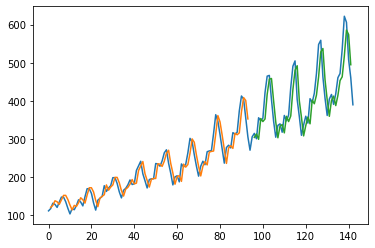

In [29]:
# plot baseline and predictions

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<span> The model has an average error of 22.76 i.e., 23 passenges (in thousands) on training dataset </span>

<span> The model has an average error of 46.53  i.e., 47 passenges (in thousands) on test dataset </span>